In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.cross_validation import cross_val_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

/Users/catherinehata/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
import plotly 
plotly.tools.set_credentials_file(username='catherinehata', api_key='JMatyB3EqCfeDb8NMZb8')

In [3]:
# Some important functions (by Helge Bjorland & Stian Eide)
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = False, 
        annot_kws = { 'fontsize' : 12 }
    )
    plt.show()

# 1. CSV to Dataframe

In [4]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.1 Exploring data

In [5]:
# features with null/ NaN entries
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.2 Visualize/ Clean up data

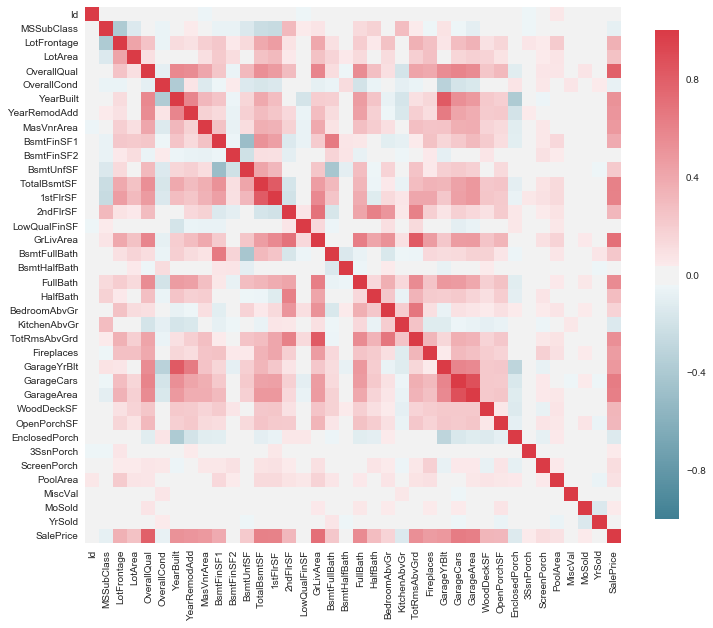

In [7]:
# Heatmap to see which variables are important 
plot_correlation_map(train_set)

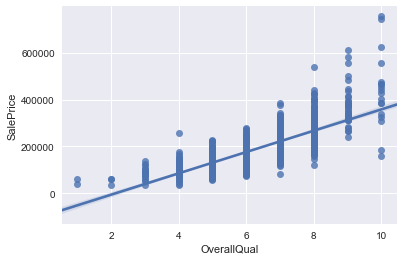

In [8]:
# There is a strong correlation between overall quality and sale price. Let's visualize this correlation
sns.regplot(x = "OverallQual", y="SalePrice", data=train_set, x_ci='ci', scatter=True)

In [9]:
# Clean up data and take care of NaN entries
# Drop all columns whose NaN entries take up more than 20 % of the samples.
no_rows_train = train_set.shape[0]
no_rows_test = test_set.shape[0]
train_set = train_set.dropna(axis = 1, thresh = int(0.5*no_rows_train))
test_set = test_set.dropna(axis = 1, thresh = int(0.5*no_rows_test))
# Fill NaN values with the mean or most frequent values
train_set = train_set.fillna(train_set.mean())
test_set = test_set.fillna(test_set.mean())
train_set = train_set.apply(lambda x:x.fillna(x.value_counts().index[0]))
test_set = test_set.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [10]:
# Features only
X_train = train_set.drop(['Id', 'SalePrice'], axis = 1)
X_test = test_set.drop(['Id'], axis = 1)
X_combined = pd.concat([X_train, X_test])
features = X_train.columns  
for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(X_combined[feature])
    X_train[feature] = le.transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

y_train = train_set['SalePrice']

# Apply standard scaler to data
scaler_tr = preprocessing.StandardScaler().fit(X_train)
X_train = scaler_tr.transform(X_train)
scaler_te = preprocessing.StandardScaler().fit(X_test)
X_test = scaler_te.transform(X_test)

In [11]:
# Use PCA to reduce the dimension to 20 dimensions
pca_10 = PCA(n_components=10)
pca_train_10 = pca_10.fit_transform(X_train)
pca_test_10 = pca_10.fit_transform(X_test)
print('Explained variation per principal component: {}'.format(pca_10.explained_variance_ratio_))

Explained variation per principal component: [ 0.15126939  0.05513579  0.04872738  0.04049747  0.03343454  0.02871252
  0.02398958  0.02335387  0.02148672  0.02073353]


In [12]:
# Use tsne to visualize how data is scattered according to 3 most important features

#tsne = TSNE(n_components=2, init='random', random_state = 101).fit_transform(pca_train_50)

'''
trace = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = preprocessing.LabelEncoder().fit_transform(y_train),
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace]
layout=dict(height=800, width=800, title='3D embedding of Features')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3DFeatures')
'''


"\ntrace = go.Scatter3d(\n    x=tsne[:,0],\n    y=tsne[:,1],\n    z=tsne[:,2],\n    mode='markers',\n    marker=dict(\n        sizemode='diameter',\n        color = preprocessing.LabelEncoder().fit_transform(y_train),\n        colorscale='Viridis',   # choose a colorscale\n        opacity=0.8\n    )\n)\n\ndata = [trace]\nlayout=dict(height=800, width=800, title='3D embedding of Features')\nfig = go.Figure(data=data, layout=layout)\npy.iplot(fig, filename='3DFeatures')\n"

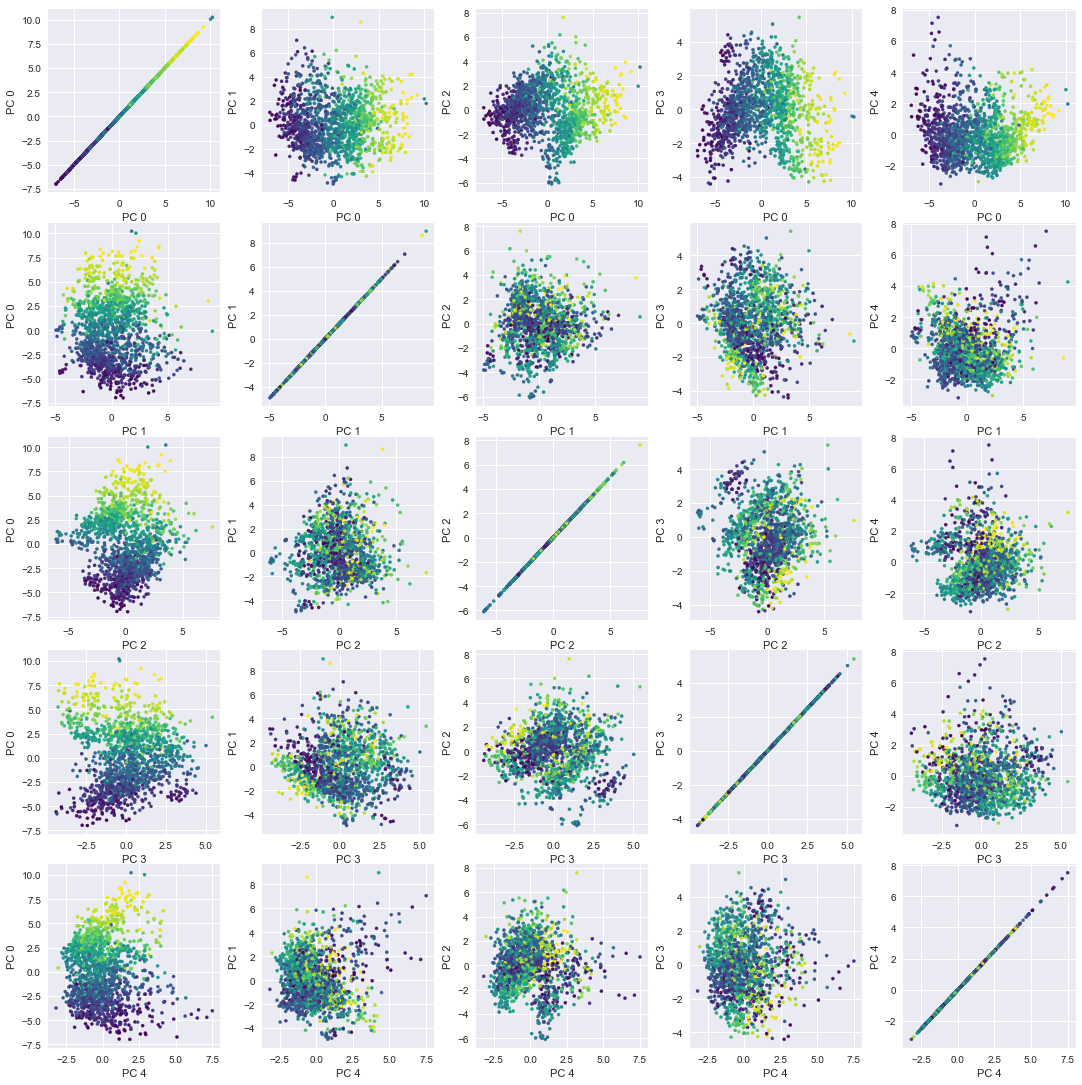

In [13]:
# How data is scattered according to two principal components (We compare the first 5 hold 92% total variation in the data)
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (15, 15))
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
for i in range(5):
    for j in range(5):
        ax[i,j].scatter(x = pca_train_10[:,i], y = pca_train_10[:,j], 
            c = preprocessing.LabelEncoder().fit_transform(y_train), s = 10, cmap = 'viridis')
        ax[i,j].set_xlabel('PC %s' %(i))
        ax[i,j].set_ylabel('PC %s' %(j))
plt.show()

In [15]:
# We observe from the subplots that few principal components show a heterogeneous model when plotted against 
# each other while others show there's an increasing trend in house price when plotted against any other PC (ex. PC 0 
# also known as the first principal component, from first column and first row)

/Users/catherinehata/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



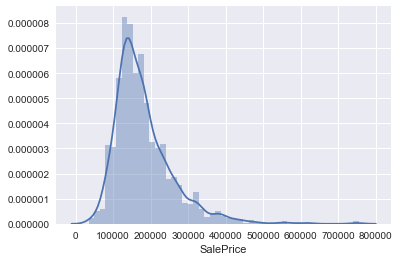

In [14]:
# Examine the distribution of Sale Price
fig_sp = sns.distplot(y_train)

/Users/catherinehata/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



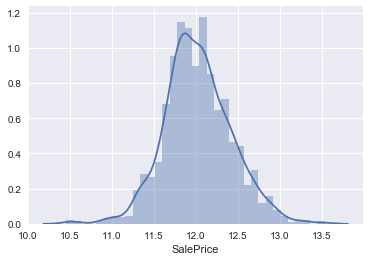

In [15]:
# Log transform the sale price to minimize the skew
y_train = np.log(y_train)
fig_sp_log = sns.distplot(y_train)

# 2. Apply a ML Algorithm

## 2.1 Shuffle and split up training data

In [16]:
# We use the 20 principal components as features since they hold >99% of the total variation
# We want to train 20% of the data 
# First we shuffle

pca_train_10, y_train = shuffle(pca_train_10, y_train, random_state = 5)

num_test = 0.20
X_tr, X_te, y_tr, y_te = train_test_split(pca_train_10, y_train, test_size=num_test, random_state=200)

## 2.2 Select an algorithm

In [17]:
# We use an advanced regression technique as the assignment requests, in this case, random forest regressor

# Choose the type of regressor
rfr = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 7, 10], 
              'max_features': ['auto'], 
              'criterion': ['mse','mae'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Use r2 score compare parameter combinations
r2_scorer = make_scorer(r2_score)

# Run the grid search, using r2 score for comparison
grid_obj = GridSearchCV(rfr, parameters, scoring=r2_scorer)
grid_obj = grid_obj.fit(X_tr, y_tr)

# Set the rfr to the best combination of parameters
rfr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rfr.fit(X_tr, y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [18]:
predictions = rfr.predict(X_te)
print(mean_squared_error(y_te, predictions))

0.0251668279408


## 2.3 Use k-fold cross validation to see how well our model performs

In [19]:
scores = cross_val_score(estimator = rfr,
                        X = pca_train_10,
                        y = y_train,
                        cv = 10,
                        n_jobs = 2)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.88363213  0.87575161  0.807314    0.87230736  0.82123881  0.83743813
  0.8789366   0.82526114  0.86874779  0.83034224]
CV accuracy: 0.850 +/- 0.027


## 2.4 Predict the actual test data

In [20]:
ids = test_set['Id']
predictions = np.exp(rfr.predict(pca_test_10))


output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('House-price-predictions.csv', index = False)
print(output)

        Id      SalePrice
0     1461  155049.366153
1     1462  169380.932446
2     1463  187832.329441
3     1464  194670.457170
4     1465  175372.346596
5     1466  163447.530872
6     1467  186064.004313
7     1468  179725.043230
8     1469  165769.233043
9     1470  166785.002154
10    1471  196804.203077
11    1472   98154.353176
12    1473   95061.441844
13    1474  153725.614172
14    1475  112921.010545
15    1476  343409.276914
16    1477  237396.464753
17    1478  392053.984166
18    1479  288568.718250
19    1480  626202.135112
20    1481  312571.092013
21    1482  206941.141475
22    1483  196614.490039
23    1484  171775.303369
24    1485  188702.923209
25    1486  187871.534658
26    1487  366033.855887
27    1488  243639.784022
28    1489  192237.466468
29    1490  241787.550892
...    ...            ...
1429  2890   53526.384068
1430  2891  134001.042157
1431  2892   99086.920585
1432  2893  100831.732072
1433  2894   94400.922837
1434  2895  280025.129045
1435  2896  